# Šíření nemoci - SIR model

## Vypracoval Marek Tremel roku 2024, F23211

### Zadání

- **Výstup**: Grafické zobrazení průběhu nemoci, alespoň pro 3 skupiny parametrů. Např. Pro případ malého nebo velkého počtu nakažených na počátku, při různých velikostech koeficientů β a γ

- Použité knihovny

In [34]:
import numpy as np
import matplotlib.pyplot as plt

## SIR model
SIR model je základní epidemiologický model, který rozděluje populaci do tří skupin během epidemie: zdraví jedinci (S), nakažení jedinci (I) a vyléčení jedinci (R). Model sleduje, jak se tyto skupiny mění v čase na základě dvou parametrů: přenosové rychlosti (𝛽) a rychlosti uzdravení nebo smrti (𝛾).
### Rovnice
$
\frac{dS}{dt} = -\beta \frac{S(t)I(t)}{N} \\
$

$
\frac{dI}{dt} = \beta \frac{S(t)I(t)}{N} - \gamma I(t) \\
$

$
\frac{dR}{dt} = \gamma I(t)
$
### Podmínky
$S(t)$ + $I(t)$ + $R(t)$ = $N$

$\frac{dS}{dt}$ + $\frac{dI}{dt}$ + $\frac{dR}{dt}$ = 0

## Eulerova 
- Funkce pro numerické řešení diferenciální rovnice pomocí Eulerovy metody.

In [35]:
def euler(f, y0, x):
    # Funkce pro numerické řešení diferenciální rovnice pomocí Eulerovy metody.
    # f: Funkce popisující diferenciální rovnici.
    # y0: Počáteční podmínky.
    # x: Pole hodnot času.
    
    y = np.zeros((len(x), len(y0)))  # Inicializace pole pro ukládání výsledků.
    y[0] = y0  # Nastavení počátečních podmínek.
    h = x[1] - x[0]  # Výpočet délky časového kroku.
    
    # Iterace přes časové body a výpočet numerického řešení.
    for i in range(len(x) - 1):
        y[i + 1] = y[i] + f(y[i], x[i]) * h  # Eulerova metoda pro výpočet další hodnoty.
    
    return y  # Vrací pole s vypočtenými hodnotami v různých časech.

## Model
- Hlavní funkce pro modelování šíření nemoci pomocí SIR modelu.

In [36]:
def main(beta=3, gamma=1, population=50, I=10, t=10):
    """Modelování šíření nemoci. Model SIR.

    Args:
        beta: Parametr přenosové rychlosti. Výchozí hodnota je 3.
        gamma: Parametr rychlosti rekonvalescence . Výchozí hodnota je 1..
        population: Celková velikost populace. Výchozí hodnota je 50.
        I: Počáteční počet infikovaných jedinců. Výchozí hodnota je 10.
        t: Doba trvání. Výchozí hodnota je 10.
    """
    S = population - I  # Počet zdravých (S)
    R = population - S - I  # Počet vyléčených (R)

    def model(y, t):
        # Funkce popisující SIR model pomocí diferenciálních rovnic.
        # y: Pole stavových proměnných [S, I, R].
        # t: Čas (není používán, protože model je časově nezávislý).
        
        dSdt = -beta * y[0] * y[1] / population  # Rovnice pro S (zdraví)
        dIdt = beta * y[0] * y[1] / population - gamma * y[1]  # Rovnice pro I (nakažení)
        dRdt = gamma * y[1]  # Rovnice pro R (vyléčení)
        return np.array([dSdt, dIdt, dRdt])  # Vrací pole s hodnotami změn stavových proměnných.

    y0 = np.array([S, I, R])  # Počáteční podmínky pro SIR model.


    time = np.linspace(0, t, 1000)  # Časové body, ve kterých se budou počítat hodnoty.


    y = euler(model, y0, time)  # Volání funkce euler pro výpočet vývoje stavových proměnných.


    susceptible = y[:, 0]  # Pole zdravých (S) v čase.
    infected = y[:, 1]  # Pole nakažených (I) v čase.
    recovered = y[:, 2]  # Pole vyléčených (R) v čase.

    plt.figure(figsize=(10, 6))
    plt.plot(time, susceptible, label='S')
    plt.plot(time, infected, label='I')
    plt.plot(time, recovered, label='R')
    plt.title('SIR model')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()
    plt.grid(True)
    plt.show()



## SIR model 1
* $N$ = 50
* $I$ = 10
* $\beta$ = 3
* $\gamma$ = 1

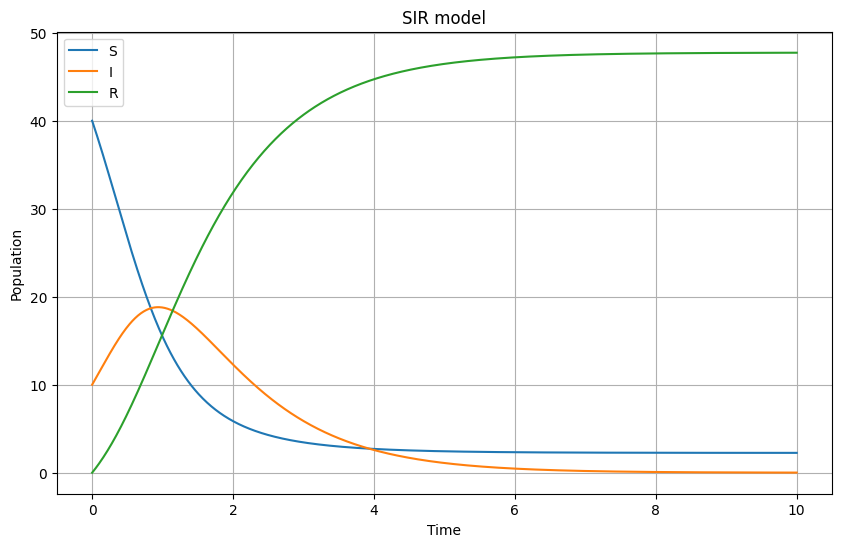

In [44]:
main()

## SIR model 2
* $N$ = 50
* $I$ = 20
* $\beta$ = 2
* $\gamma$ = 3

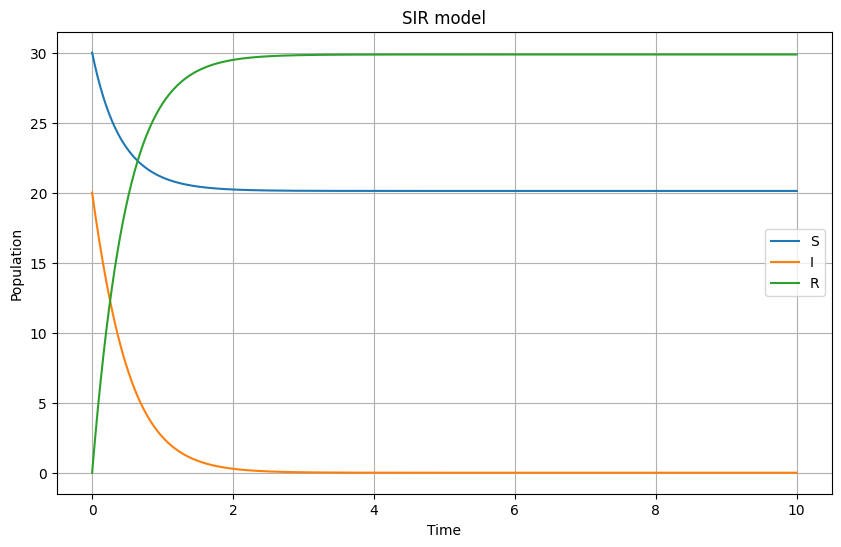

In [43]:
main(beta=2, gamma=3, I=20)

## SIR model 3
* $N$ = 50
* $I$ = 30
* $\beta$ = 5
* $\gamma$ = 5

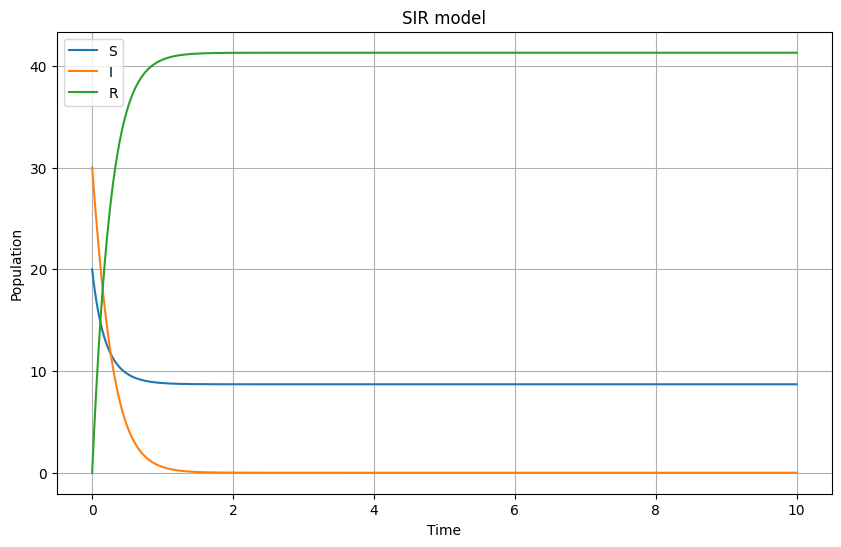

In [41]:
main(beta=5, gamma=5, I=30)

## Slovní ohodnocení 
Projekt se zaměřuje na implementaci epidemiologického modelu SIR pomocí Pythonu. Model rozděluje populaci na zdravé (S), nakažené (I) a vyléčené (R) jedince a sleduje jejich vývoj v čase na základě parametrů přenosové rychlosti (β) a rychlosti uzdravení (γ).

Pro matematický výpočet diferenciálních rovnic jsem využil Eulerovu metodu, která umožňuje simulovat změny stavových proměnných S, I, R v čase. Funkci jsem otestoval na různých případech

Pomocí knihovny MatPlotLib jsem uskutečnil grafický pohled na jednotlivé situace nákazy.

Projekt nejenže poskytl užitečné praktické dovednosti v programování a matematické modelování, ale také přispěl k lepšímu porozumění chování epidemiologických modelů při simulaci šíření nemocí.

Projekt mi ukázal, jak fungují základy matematického modelování v Pythonu prostřednictvím implementace epidemiologického modelu SIR. Implementace modelu pomocí Pythonu a využití numerických metod, jako je Eulerova metoda, mi umožnila prakticky prozkoumat vliv různých parametrů, jako jsou přenosová rychlost a rychlost uzdravení, na dynamiku šíření nemoci.


### Literatura (zdroje)

1. Matematické fórum. Online. Dostupné z: https://forum.matweb.cz/viewtopic.php?id=110561. [cit. 2024-06-20].
2. CodeSansar. Online. Dostupné z: https://www.codesansar.com/numerical-methods/eulers-method-python-program.htm. [cit. 2024-06-20].
